In [2]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import math

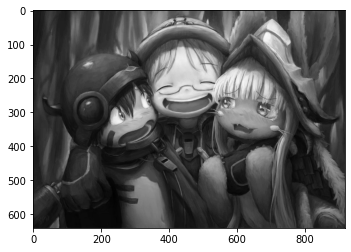

In [9]:
image = plt.imread('img/gambar.jpg')
gbr = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
plt.imshow(gbr, 'gray')

In [12]:
padding = np.pad(gbr,[1],'constant')
padding[0: gbr.shape[0]+2, 0: gbr.shape[1]+2]

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0, 45, 35, ..., 36, 35,  0],
       [ 0, 41, 31, ..., 32, 32,  0],
       ...,
       [ 0, 28, 19, ..., 31, 30,  0],
       [ 0, 31, 22, ..., 36, 36,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8)

In [20]:
# inisialisasi jendela
Sx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
Sy = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
print(Sx,'\n\n' ,Sy)

[[-1  0  1]
 [-2  0  2]
 [-1  0  1]] 

 [[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


# SOBEL

In [27]:
def Sobel (image, padding, sx, sy):
    Gx = np.zeros([image.shape[0], image.shape[1]])
    Gy = np.zeros([image.shape[0], image.shape[1]])

    sum = np.zeros([image.shape[0], image.shape[1]])
    kernel = np.zeros([3, 3])

    for first in range (2):
        if first==0:
            kernel = sx
        else:
            kernel = sy
        
        for i in range (1, padding.shape[0]-1):
            for j in range (1, padding.shape[1]-1):
                x = padding[i-1, j-1]*kernel[0, 0] + padding[i-1, j]*kernel [0, 1] + padding[i-1, j+1]*kernel[0, 2]
                y = padding[i, j-1]*kernel[1, 0] + padding[i, j]*kernel [1, 1] + padding[i, j+1]*kernel[1, 2]
                z = padding[i+1, j-1]*kernel[2, 0] + padding[i+1, j]*kernel [2, 1] + padding[i+1, j+1]*kernel[2, 2]
                if first==0:
                    Gx[i-1, j-1] = x+y+z
                else:
                    Gy[i-1, j-1] = x+y+z
        
        for i in range(image.shape[0]):
            for j in range(image.shape[1]):
                hasil = round(math.sqrt((Gx[i, j]**2)+(Gy[i, j]**2)))
                sum[i, j] =  hasil
    

    return sum



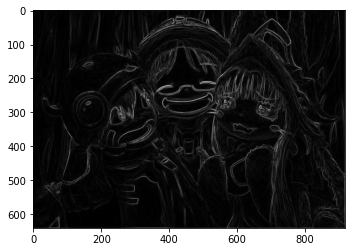

In [30]:
withSobel = Sobel(gbr, padding, Sx, Sy)
plt.figure(facecolor='white')
plt.imshow(withSobel, 'gray')